### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [ ]:
#Claire Bilski

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')
datadf = pd.DataFrame(data)
itemdf = pd.DataFrame(item)
userdf = pd.DataFrame(user)

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
#Apply info,shape, describe to datadf
datadf.info()
datadf.shape
datadf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [4]:
#Finding the number of missing values in datadf
def missing_check(datadf):
    total = datadf.isnull().sum().sort_values(ascending=False)   # total number of null values
    return total # return the total
missing_check(data)
#No values appear to be missing

timestamp    0
rating       0
movie id     0
user id      0
dtype: int64

In [8]:
#Applying info,shape, describe to itemdf
itemdf.info()
itemdf.shape
itemdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Finding the number of missing values in itemdf
def missing_check(itemdf):
    total = itemdf.isnull().sum().sort_values(ascending=False)   # total number of null values
    return total # return the total
missing_check(item)
#No values appear to be missing

Western         0
War             0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
movie id        0
dtype: int64

In [6]:
#Applying info,shape, describe to userdf
userdf.info()
userdf.shape
userdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [7]:
#Finding the number of missing values in userdf
def missing_check(userdf):
    total = userdf.isnull().sum().sort_values(ascending=False)   # total number of null values
    return total # return the total
missing_check(user)
#No values appear to be missing

zip code      0
occupation    0
gender        0
age           0
user id       0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [25]:
# use sum on the default axis
itemdf.sum(axis=0)

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [12]:
#Drop 'movie id' to accurately Sum how many movies have genres greater than 1
movie_genres = itemdf.drop(['movie id'],axis=1)
#hint: use sum on the axis = 1
#Logic to find movies with genre greater than 1
movie_genres.sum(axis=1)>1

0        True
1        True
2       False
3        True
4        True
        ...  
1676    False
1677     True
1678     True
1679    False
1680    False
Length: 1681, dtype: bool

In [13]:
#Print movies with genre greater than one
movie_genres.loc[movie_genres.sum(axis=1)<=1, 'movie title'] = 'X'
print(movie_genres['movie title'])

0           Toy Story 
1           GoldenEye 
2                    X
3          Get Shorty 
4             Copycat 
             ...      
1676                 X
1677        B. Monkey 
1678    Sliding Doors 
1679                 X
1680                 X
Name: movie title, Length: 1681, dtype: object


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [51]:
#Find movie where genre is unknown (there's only 1 according to Q4)
itemdf.loc[itemdf['unknown'] == 1] 
#Drop movie by index
itemdf_new = itemdf.drop(index=1371) 
#Test to see that the movie has been dropped
itemdf_new.loc[itemdf_new['unknown']==1] 
#Test passed
print(itemdf_new)

      movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childrens  Comedy  Crime  ...  Film-Noi

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

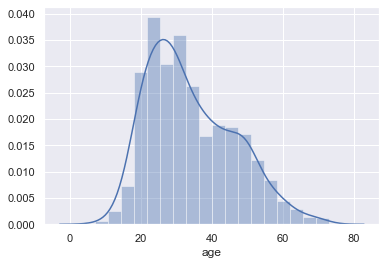

In [4]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

#Displot for Age
df1 = userdf['age']
#Check for missing values
df1.isnull().sum()
sns.distplot(df1) 

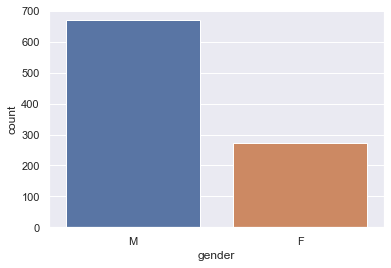

In [5]:
#Countplot for Gender
df2 = userdf['gender']
df2.isnull().sum()
sns.countplot(df2)

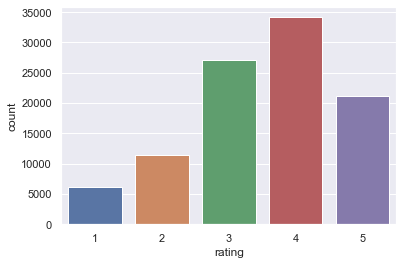

In [6]:
#Countplot for Rating
df3 = datadf['rating']
df3.isnull().sum()
sns.countplot(df3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

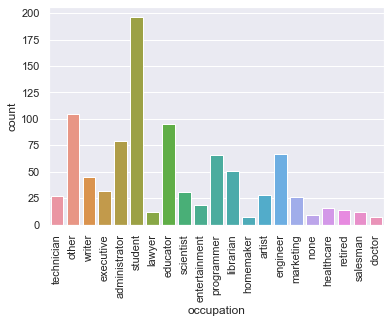

In [7]:
#Countplot for Occupation
df4 = userdf['occupation']
df4.isnull().sum()
sns.countplot(df4)
plt.xticks(rotation='vertical')

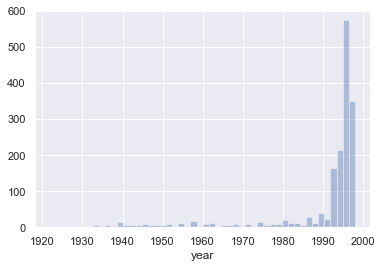

In [52]:
#Displot without kde for Release Year
#Find all Release Years
df5 = itemdf_new
df5['year'] = itemdf_new['release date'].str.split("-").str[2]
df6 = df5['year']
sns.distplot(df6, kde=False)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

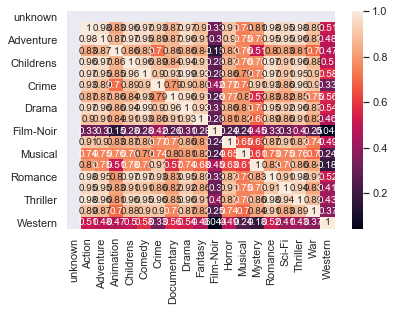

In [218]:
# Create dataframe with release year as index
df7 = itemdf_new.drop(columns=['movie id', 'movie title','release date'])
df7.set_index('year')
#Find number of releases in a year in one genre
df8 = df7.groupby('year')
df9 = df8.sum() 

#Use heatmap to visualize all changes in popularity over the years
sns.heatmap(df9.corr(), annot=True)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [217]:
#Merge dataframes and columns needed for excercise
df10 = datadf.drop(columns=['user id', 'timestamp'])
df11 = itemdf_new.drop(columns=['year','release date','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
df12 = pd.merge(df10, df11, left_on='movie id', right_on='movie id', how='left').drop('movie id', axis=1)

#Find movies that have more than 100 ratings
grouped = df12.groupby('movie title')
countofr = grouped.count()
countofr.loc[countofr['rating']>100]
d13 = countofr.loc[countofr['rating']>100]

#Extract movie titles into a list
my_list = d13.index
l = my_list.values.tolist()

#Find the average rating of all movies
df14 = df12.groupby('movie title')
dfavg = df14.mean()

#Sort in descending order
dfavg.sort_values(by=['rating'], inplace=True, ascending=False)

#Filter out movies which have do not have more than 100 ratings
Filter_df  = dfavg[dfavg.index.isin(l)]

#Print the top 25 according to average ratings 
print(Filter_df.iloc[:25])

                                                    rating
movie title                                               
Close Shave, A                                           4
Schindler's List                                         4
Wrong Trousers, The                                      4
Casablanca                                               4
Shawshank Redemption, The                                4
Rear Window                                              4
Usual Suspects, The                                      4
Star Wars                                                4
12 Angry Men                                             4
Citizen Kane                                             4
To Kill a Mockingbird                                    4
One Flew Over the Cuckoo's Nest                          4
Silence of the Lambs, The                                4
North by Northwest                                       4
Godfather, The                                          

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [219]:
#Create dataframe with columns gender, rating, Drama, Romance, and Sci-Fi
df15 = datadf.drop(columns=['timestamp'])
df16 = itemdf_new.drop(columns=['movie title','year','release date','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Fantasy','Film-Noir','Horror','Musical','Mystery','Thriller','War','Western'])
df17 = userdf.drop(columns=['occupation','age','zip code'])
df18 = pd.merge(df15, df16, left_on='movie id', right_on='movie id', how='left').drop('movie id', axis=1)
Base_df = pd.merge(df17, df18, left_on='user id', right_on='user id', how='left').drop('user id', axis=1)

#Validate first statement: Men watch more Drama than Women
male = Base_df[Base_df['gender'] == 'M']      #74,260 total ratings for men
female = Base_df[Base_df['gender'] == 'F']    #25,740 total ratings for females

res1 = male['Drama'].sum() 
res2 = female['Drama'].sum()
mdp = res1/male['rating'].count()*100     #38.90% of the men watch Drama
fdp = res2/female['rating'].count()*100   #42.77% of the women watch Drama, therefore the statement is FALSE
print(mdp.astype(int),'% of men watch Drama movies while',fdp.astype(int),'% of women watch Drama movies.')

#Validate second statement: Women watch more Sci-Fi than Men
res3 = male['Sci-Fi'].sum() 
res4 = female['Sci-Fi'].sum()
msp = res3/male['rating'].count()*100     #13.60% of the men watch Sci-Fi
fsp = res4/female['rating'].count()*100   #10.21% of the women watch Sci-Fi, therefore the statement is FALSE
print(msp.astype(int),'% of men watch Sci-Fi movies while',fsp.astype(int),'% of women watch Sci-Fi movies.')

#Validate third statement: Men watch more Romance than women
res5 = male['Romance'].sum() 
res6 = female['Romance'].sum()
mrp = res5/male['rating'].count()*100     #18.32% of the men watch Romance
frp = res6/female['rating'].count()*100   #22.76% of the women watch Romance, therefore the statement is FALSE
print(mrp.astype(int),'% of men watch Romance movies while',frp.astype(int),'% of women watch Romance movies.')


38 % of men watch Drama movies while 42 % of women watch Drama movies.
13 % of men watch Sci-Fi movies while 10 % of women watch Sci-Fi movies.
18 % of men watch Romance movies while 22 % of women watch Romance movies.


#### Conclusion:



In [ ]:
A higher percentage of women watch Drama movies than men, therefore statement 1 is False.
A higher percentage of men watch Sci-Fi than women, therefore statement 2 is False.
A higher percentage of women watch Romance than men, therefore statement 3 is False.